In [1]:
import pandas as pd
import numpy

In [2]:
police = pd.read_csv("Police-Blotter.csv")
sort_police = police.sort_values("INCIDENTNEIGHBORHOOD", inplace = True)

In [3]:
police.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
17893,2838132,16107592.0,6,2016-06-10T22:30:00,"Allegheny SQ & East Commons Pittsburgh, PA 15212",N,Allegheny Center,1,THEFT FROM AUTO,3304 Criminal Mischief. / 3934 Theft from Vehicle,2204.0,1.0,1.0,-80.003840,40.453434
189064,3114538,19216346.0,26,2019-10-23T14:59:00,"East Ohio ST & Cedar AV Pittsburgh, PA 15212",Y,Allegheny Center,1,DRUG PARAPHERNALIA,13(a)(32) Paraphernalia - Use or Possession,2204.0,1.0,1.0,-80.001697,40.453320
42689,2099230,5079795.0,99,2005-05-10T19:10:00,"BRIGHTON RD & PENNSYLVANIA AV PITTSBURGH, PA",Y,Allegheny Center,1,NaN,9498 302 (Mental),2204.0,1.0,1.0,-80.015348,40.456096
70968,2899700,17046357.0,26,2017-03-14T19:34:00,"100 Block South Commons Pittsburgh, PA 15212",Y,Allegheny Center,1,CRIMINAL TRESPASS,3503(b)(1)(i) Actual Communication,2204.0,1.0,1.0,-80.005189,40.451003
8878,2818870,16053508.0,99,2016-03-25T15:25:00,"200 Block East Ohio ST Pittsburgh, PA 15212",Y,Allegheny Center,1,NaN,9501 Bench Warrant,2204.0,1.0,1.0,-80.003660,40.453022


In [4]:
crimesPerNeighborhood = police['INCIDENTNEIGHBORHOOD'].value_counts()
crimesFrame = pd.DataFrame(crimesPerNeighborhood)
crimesFrame['Neighborhood'] = list(crimesFrame.index)
crimesFrame.head()

,INCIDENTNEIGHBORHOOD,Neighborhood
South Side Flats,11726,South Side Flats
Central Business District,8854,Central Business District
Carrick,6605,Carrick
Bloomfield,5532,Bloomfield
Shadyside,5109,Shadyside


In [5]:
crimesPerNeighborhood.iloc[0:33].plot.bar()

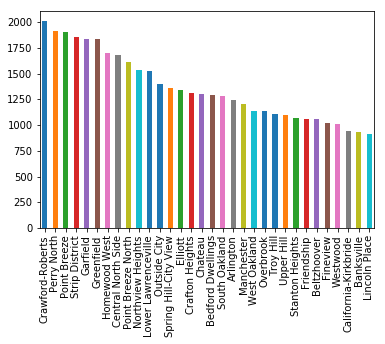

In [6]:
crimesPerNeighborhood.iloc[34:66].plot.bar()

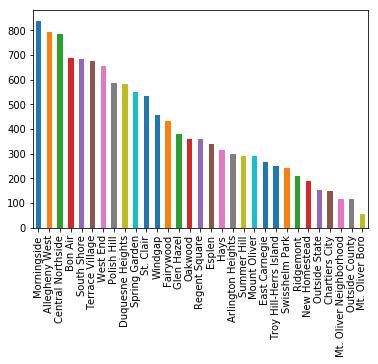

In [11]:
crimesPerNeighborhood.iloc[67:99].plot.bar()

In [7]:
typesOfCrimes = police['INCIDENTHIERARCHYDESC'].value_counts()
typesOfCrimes.head(10)

THEFT FROM AUTO                   11159
THEFT/ALL OTHERS                   9122
SIMPLE ASSAULT/INJURY              7624
CRIMINAL MISCHIEF (AUTO)           7451
CRIMINAL MISCHIEF                  5312
HARRASSMENT/THREAT/ATTEMPT/PHY     5144
RETAIL THEFT (SHOPLIFTING)         5075
MTR VEH THEFT (AUTO)               4257
MARIJUANA-POSSESS                  3414
BURGLARY/FORCE ENT/RES             3117
Name: INCIDENTHIERARCHYDESC, dtype: int64

In [8]:
population = pd.read_csv("population_data.csv")
pops = population.loc[:, ['Neighborhood','Population (2010)']]
pops.head()

,Neighborhood,Population (2010)
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,"2,500"
3,Arlington,"1,869"
4,Arlington Heights,244


In [9]:
crimeFrame = pd.DataFrame(crimesPerNeighborhood)
crimeFrame.head()
ratio = pd.merge(crimesFrame, pops, how='inner', left_on='Neighborhood', right_on='Neighborhood')
count = 0
for x in ratio['Population (2010)']:
    ratio['Population (2010)'][count] = x.replace(',','')
    count = count+1

ratio['Population (2010)'] = ratio['Population (2010)'].astype(int)
ratio['rat'] = ratio['INCIDENTNEIGHBORHOOD']/ratio['Population (2010)']
ratio.head(10)

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,INCIDENTNEIGHBORHOOD,Neighborhood,Population (2010),rat
0,11726,South Side Flats,6597,1.777475
1,8854,Central Business District,3629,2.439791
2,6605,Carrick,10113,0.653120
3,5532,Bloomfield,8442,0.655295
4,5109,Shadyside,13915,0.367158
5,4298,Squirrel Hill South,15110,0.284447
6,4295,Homewood South,2344,1.832338
7,4282,East Liberty,5869,0.729596
8,4008,Mount Washington,8799,0.455506
9,3886,Brookline,13214,0.294082


In [16]:
ratio.sort_values(by='rat')

,INCIDENTNEIGHBORHOOD,Neighborhood,Population (2010),rat
85,244,Swisshelm Park,1361,0.179280
87,188,New Homestead,990,0.189899
69,675,Terrace Village,3228,0.209108
25,2475,Squirrel Hill North,11363,0.217812
61,932,Banksville,4144,0.224903
55,1064,Stanton Heights,4601,0.231254
72,581,Duquesne Heights,2425,0.239588
64,839,Morningside,3346,0.250747
38,1837,Greenfield,7294,0.251851
66,786,Central Northside,2923,0.268902
